In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.shape

(8425, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [6]:
df.describe(include=[object])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,8425,8425,7434,7596,8117,8185,8186
unique,3004,12,16,16,16,2,2
top,2011-01-31,Melbourne,N,N,SE,No,No
freq,5,1622,713,906,813,6195,6195


In [7]:
for col in ['Location', 'WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']:
    print(df[col].value_counts())

Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: count, dtype: int64
WindGustDir
N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: count, dtype: int64
WindDir9am
N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: count, dtype: int64
WindDir3pm
SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: count, dtype: int64
RainToday
No     6195
Yes    1990
Name: count, dtype: int64
RainTomorrow


In [8]:
s = 0
for col in ['Location', 'WindGustDir','WindDir9am','WindDir3pm']:
    print(col,':',df[col].nunique())
    s = s + df[col].nunique()
print('Sum:',s)    

Location : 12
WindGustDir : 16
WindDir9am : 16
WindDir3pm : 16
Sum: 60


In [9]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<Axes: >

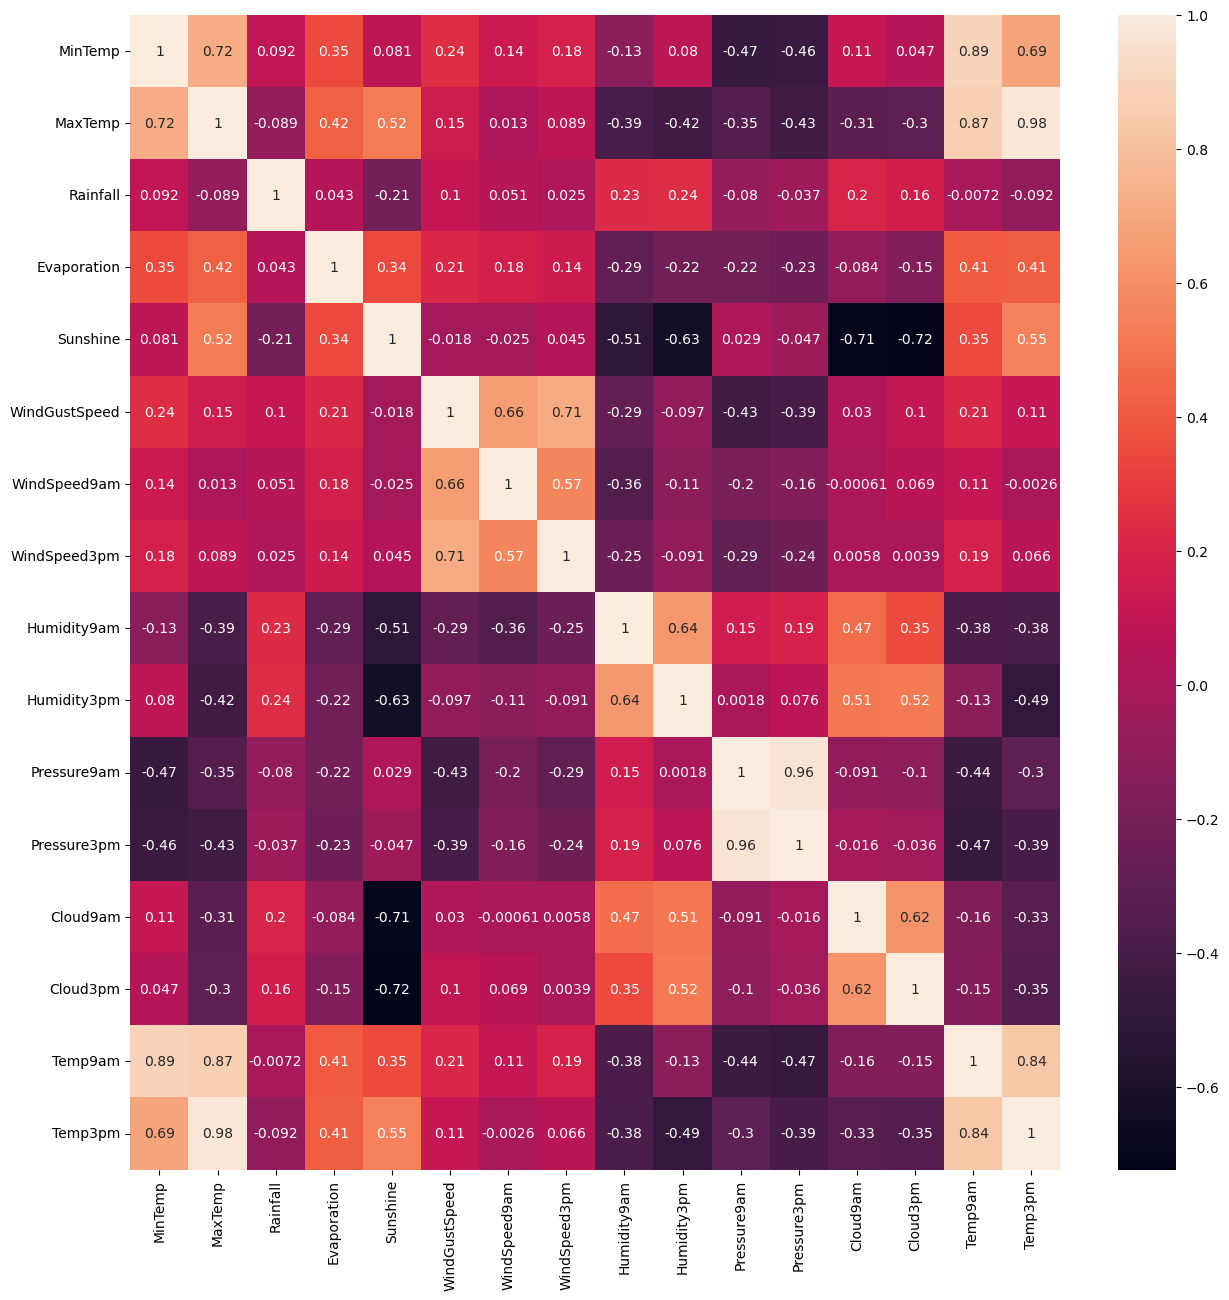

In [10]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

In [11]:
#filling the missing values with mode for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace = True)

In [12]:
#filling the missing values with median for numerical columns
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace = True)

MinTemp             Axes(0.125,0.712609;0.168478x0.167391)
MaxTemp          Axes(0.327174,0.712609;0.168478x0.167391)
Rainfall         Axes(0.529348,0.712609;0.168478x0.167391)
Evaporation      Axes(0.731522,0.712609;0.168478x0.167391)
Sunshine            Axes(0.125,0.511739;0.168478x0.167391)
WindGustSpeed    Axes(0.327174,0.511739;0.168478x0.167391)
WindSpeed9am     Axes(0.529348,0.511739;0.168478x0.167391)
WindSpeed3pm     Axes(0.731522,0.511739;0.168478x0.167391)
Humidity9am          Axes(0.125,0.31087;0.168478x0.167391)
Humidity3pm       Axes(0.327174,0.31087;0.168478x0.167391)
Pressure9am       Axes(0.529348,0.31087;0.168478x0.167391)
Pressure3pm       Axes(0.731522,0.31087;0.168478x0.167391)
Cloud9am                Axes(0.125,0.11;0.168478x0.167391)
Cloud3pm             Axes(0.327174,0.11;0.168478x0.167391)
Temp9am              Axes(0.529348,0.11;0.168478x0.167391)
Temp3pm              Axes(0.731522,0.11;0.168478x0.167391)
dtype: object

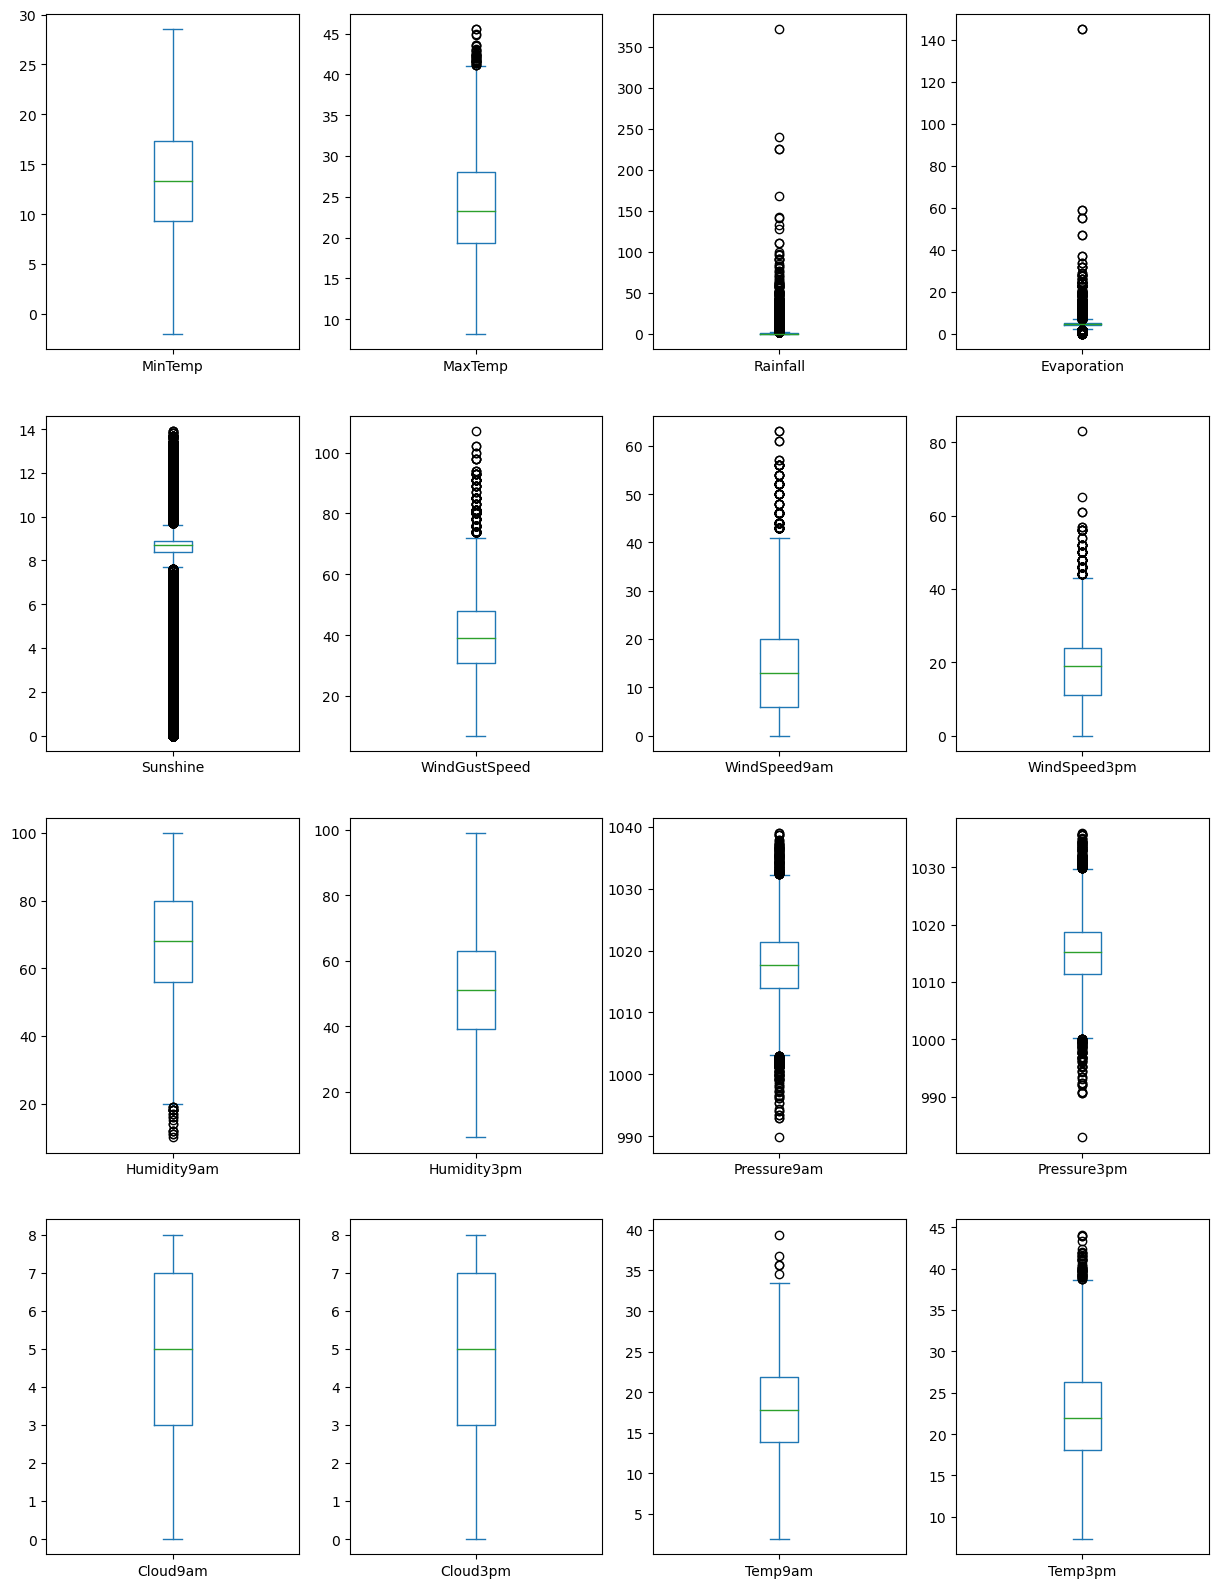

In [13]:
#finding outliers
df[num_cols].plot(kind = 'box', subplots = True, layout=(4,4), figsize = (15,20))

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

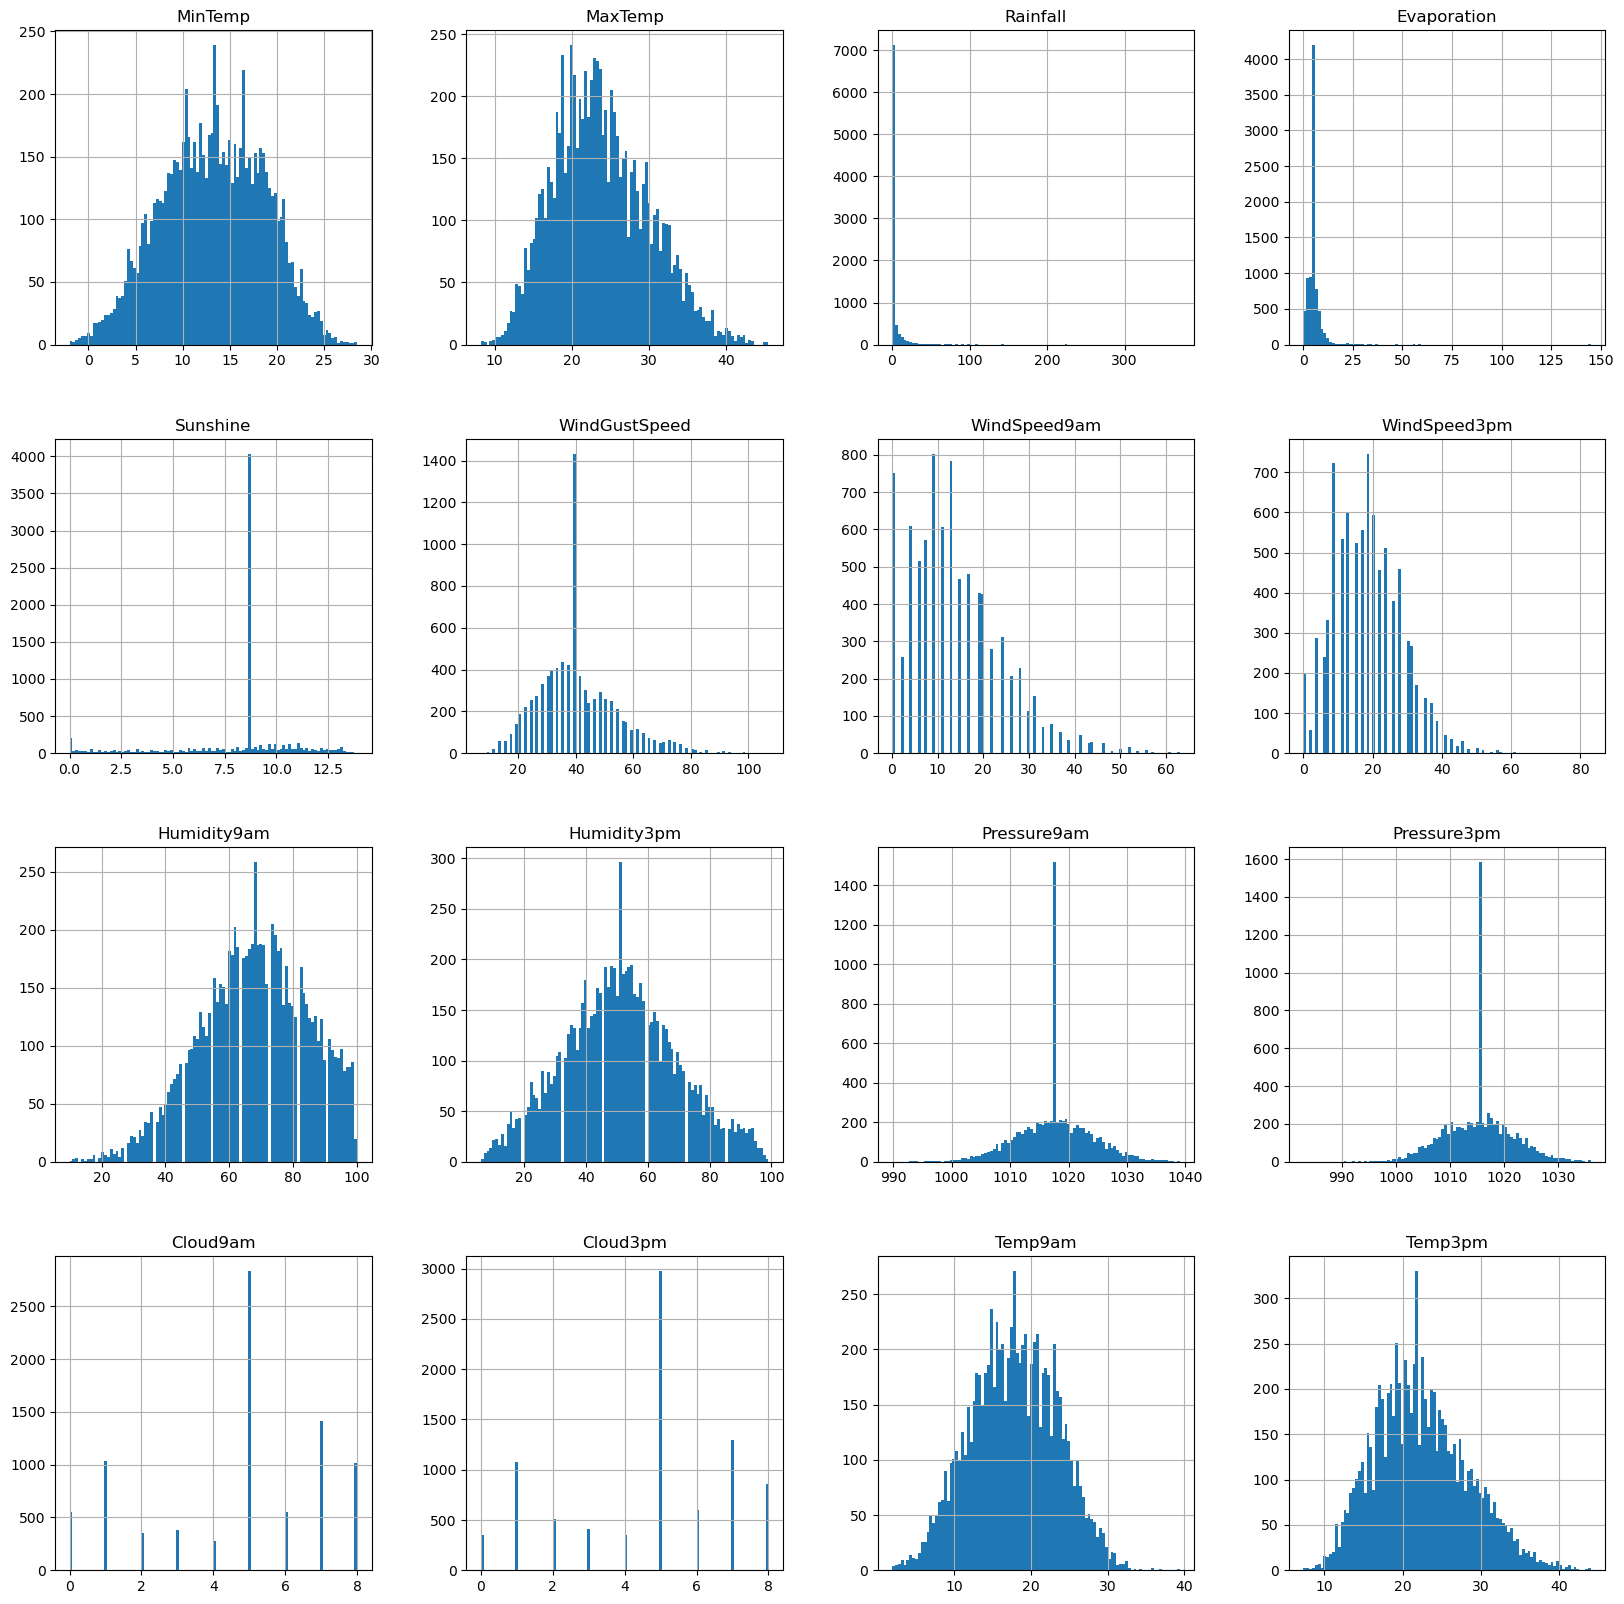

In [14]:
df[num_cols].hist(figsize=(20,20), grid = True, layout = (4,4), bins = 100)

In [15]:
#Finding the skewness of each column
for col in num_cols:
  print(col, df[col].skew())

MinTemp -0.09051865315318136
MaxTemp 0.3825719132134134
Rainfall 13.200522661614254
Evaporation 14.063999515800404
Sunshine -1.1893327900404294
WindGustSpeed 0.786152903346168
WindSpeed9am 0.9627608681367389
WindSpeed3pm 0.4923652408178854
Humidity9am -0.2569654904463148
Humidity3pm 0.11877612991758263
Pressure9am -0.02852113420972264
Pressure3pm -0.015017951793907781
Cloud9am -0.5148006556423207
Cloud3pm -0.4577129048506578
Temp9am -0.014883030461613855
Temp3pm 0.4003881166574447


rainfall and evaporation columns have very high skewness.

In [16]:
#removing outliers using IQR
for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [17]:
for col in num_cols:
  print(col, df[col].skew())

MinTemp -0.09051865315318136
MaxTemp 0.3609145463057375
Rainfall 1.189119119728406
Evaporation 0.06297323253861482
Sunshine -0.11085564889144368
WindGustSpeed 0.5396074409096852
WindSpeed9am 0.7398371212488246
WindSpeed3pm 0.33288757129352603
Humidity9am -0.24126038414901693
Humidity3pm 0.11877612991758263
Pressure9am -0.006931264747212786
Pressure3pm 0.009365948264835933
Cloud9am -0.5148006556423207
Cloud3pm -0.4577129048506578
Temp9am -0.02203232669233809
Temp3pm 0.36023156087037655


In [18]:
df['Date'].dtypes
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Datetime column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Removing the Date column
df.drop('Date', axis=1, inplace=True)

In [19]:
df.shape

(8425, 25)

In [1]:
#do standard scaler

Feature Engineering

In [20]:
# Label Encoding 'RainToday' and 'RainTomorrow'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['RainToday','RainTomorrow']:
    df[col] = le.fit_transform(df[col])

In [21]:
df.head(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.6,8.7,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,Albury,7.4,25.1,0.0,4.6,8.7,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,Albury,12.9,25.7,0.0,4.6,8.7,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3


In [22]:
# one hot encoding function for categorical features 
def onehot_encoder(df, cols):
    data = df.copy()
    for col in cols:
        dummies = pd.get_dummies(data[col],drop_first=True,prefix=col)
        # concatenating dummies and original dataframe
        data = pd.concat([data, dummies], axis=1)
        
        # dropping original columns for which encoding is applied.
        data.drop(col, axis=1,inplace=True)
    return data

In [23]:
cat_cols = ['Location', 'WindGustDir','WindDir9am','WindDir3pm']

In [24]:
# Apply onehotencoder on categorical features
df = onehot_encoder(df,cat_cols)

In [25]:
df.shape

(8425, 77)

In [30]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month',
       'Day', 'Location_Albury', 'Location_Brisbane', 'Location_CoffsHarbour',
       'Location_Darwin', 'Location_Melbourne', 'Location_Newcastle',
       'Location_Penrith', 'Location_PerthAirport', 'Location_Uluru',
       'Location_Williamtown', 'Location_Wollongong', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW'

Model Building

In [31]:
# splitting the data into X and y
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [43]:
LinearReg = LinearRegression()
LinearReg.fit(X_train, y_train)

LinearRegression()

In [44]:
pred = LinearReg.predict(X_test)

In [45]:
import sklearn.metrics as metrics

In [50]:
Report = {'MSE': [metrics.mean_squared_error(pred, y_test)], 'MAE': [metrics.mean_absolute_error(pred, y_test)], 'R2': [metrics.r2_score(pred, y_test)]}
Report=pd.DataFrame(Report)
Report.index = ['Linear Regression']
Report

,MSE,MAE,R2
Linear Regression,0.119781,0.26432,-0.959167


Decision Tree

In [51]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
pred = Tree.predict(X_test)

In [55]:
Report = {'Accuracy Score': [accuracy_score(y_test, pred)], 'MAE': [metrics.mean_absolute_error(pred, y_test)]}
Report=pd.DataFrame(Report)
Report.index = ['Decision Tree']
Report

,Accuracy Score,MAE
Decision Tree,0.852819,0.147181
